In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("portuguese")
plt.style.use('fivethirtyeight')
data = pd.read_csv(r"clean-boatos.org-2022-12-19.csv", encoding="utf-8")
data['Length'] = data['title'].apply(len)
data.groupby('Length').describe().head(20)

Unnamed: 0                                                             \
            count         mean         std     min      25%     50%      75%   
Length                                                                         
35            2.0   729.500000    0.707107   729.0   729.25   729.5   729.75   
38            2.0   389.500000    0.707107   389.0   389.25   389.5   389.75   
41            2.0   569.500000    0.707107   569.0   569.25   569.5   569.75   
42            1.0   140.000000         NaN   140.0   140.00   140.0   140.00   
46            1.0  1186.000000         NaN  1186.0  1186.00  1186.0  1186.00   
47            8.0   876.875000  424.771682   117.0   545.00  1163.0  1168.25   
48            5.0   746.200000  409.796535   404.0   405.00   540.0  1190.00   
49            1.0   585.000000         NaN   585.0   585.00   585.0   585.00   
50            5.0   611.600000  370.955253   302.0   303.00   509.0   761.00   
51            6.0   463.666667  261.417418   269.0   270.25   326.0   667.50   
52            6.0   649.000000  462.157116   179.0   245.75   580.0  1065.75   
53            6.0   259.500000  123.221346   188.0   189.25   190.5   278.00   
54            4.0   807.250000  290.426554   408.0   684.00   899.0  1022.25   
55            7.0   491.857143  438.449324    28.0   121.00   541.0   724.00   
56            9.0   410.888889  272.769795   130.0   185.00   350.0   436.00   
57            6.0   573.500000  517.027949   133.0   136.50   397.5  1054.50   
58           18.0   758.111111  268.433777   254.0   544.25   835.0   886.25   
59           14.0   656.214286  192.131437   357.0   531.00   688.0   827.75   
60           22.0   667.090909  438.686775    26.0   161.25   846.5  1024.25   
61           14.0   822.714286  238.998368   334.0   691.25   781.5   994.75   

               Unnamed: 6                                     
           max      count mean  std  min  25%  50%  75%  max  
Length                                                        
35       730.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
38       390.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
41       570.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
42       140.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
46      1186.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
47      1189.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
48      1192.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
49       585.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
50      1183.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
51       828.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
52      1193.0        2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
53       492.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
54      1023.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
55      1184.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
56       879.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
57      1190.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
58      1190.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
59       893.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
60      1185.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
61      1187.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [2]:
data.head()

,Unnamed: 0,link,date,title,text,classification,Unnamed: 6,Length
0,0,https://www.boatos.org/saude/morte-subita-died...,2022-11-30 13:18:17,"""Morte Súbita (died suddenly) O Fim da Farsa"" ...",“MORTE SÚBITA (DIED SUDDENLY) COMPARTILHE ESSE...,1,NaN,77
1,2,https://www.boatos.org/saude/mascaras-contamin...,2022-11-19 12:34:22,Máscaras contaminadas estão chegando da China ...,MÁSCARAS CONTAMINADAS DA CHINA CHEGANDO PRA ...,1,NaN,80
2,3,https://www.boatos.org/saude/teste-covid-19-ja...,2022-11-16 19:01:17,Teste de Covid-19 já vem infectado com vírus n...,Transcrição: Uma coisa no teste de covid. É um...,1,NaN,71
3,4,https://www.boatos.org/saude/criador-vacina-pf...,2022-11-16 15:55:15,"Criador da vacina da Pfizer, Robert Malone rev...",O pronunciamento que o mundo não esperava: Cri...,1,NaN,114
4,5,https://www.boatos.org/saude/nova-onda-da-covi...,2022-11-12 11:55:02,Nova onda da Covid-19 com subvariantes da Ômic...,"Olá, sou médico sanitarista e a minha especial...",1,NaN,73


In [3]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
filtered_jan_jun_2022 = data.loc[(data['date'] >= '2022-01-01') & (data['date'] <= '2022-07-01')]
filtered_jan_jun_2022

,Unnamed: 0,link,date,title,text,classification,Unnamed: 6,Length
24,36,https://www.boatos.org/saude/cotonete-dos-test...,2022-06-30 19:09:41,Cotonete dos testes de Covid-19 já estão infec...,"“Olá, amigos terapeutas. Eu recebi de vocês um...",1,NaN,81
25,38,https://www.boatos.org/mundo/homem-quebra-maqu...,2022-06-30 18:49:34,Homem quebra máquina verificadora de QR code d...,China quebra máquina de verificação de passapo...,1,NaN,72
26,39,https://www.boatos.org/saude/saiu-o-randomizad...,2022-06-14 20:07:24,Saiu o randomizado da ivermectina e hidroxiclo...,NOTÍCIA PÉSSIMA PARA AS BIGFARMAS FABRICANTES ...,1,NaN,107
27,40,https://www.boatos.org/saude/hydra-o-nano-polv...,2022-06-10 10:59:09,"Hydra, o nano polvo, é encontrado em vacina da...",TERROR: Confirmada as descobertas dos cientist...,1,NaN,70
28,41,https://www.boatos.org/saude/spray-israelense-...,2022-06-07 12:33:43,Spray israelense citado por Bolsonaro é aponta...,“Quer dizer que o spray feito em israel pode p...,1,NaN,92
...,...,...,...,...,...,...,...,...
113,158,https://www.boatos.org/saude/charles-hoffe-dol...,2022-01-03 15:42:51,"Charles Hoffe, Dolores Cahill e Sherri Tempenn...",“GRAVÍSSIMO: Vacinados estão coagulando o sang...,1,NaN,119
114,159,https://www.boatos.org/saude/charles-hoffe-dol...,2022-01-03 15:42:51,"Charles Hoffe, Dolores Cahill e Sherri Tempenn...","’Porque, você sabe, existem alguns tecidos em...",1,NaN,119
115,161,https://www.boatos.org/saude/flurona-uma-nova-...,2022-01-02 16:19:06,Flurona é uma nova variante da Covid-19 detect...,Luz giratória de carros de polícia BREAKING Pr...,1,NaN,60
116,162,https://www.boatos.org/saude/flurona-uma-nova-...,2022-01-02 16:19:06,Flurona é uma nova variante da Covid-19 detect...,NOVA VARIANTE: Flurona Em Israel (começa sem...,1,NaN,60


In [4]:
import re
import nltk
nltk.download('punkt')
from nltk import tokenize 
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer(language="portuguese")

filtered_jan_jun_2022['title'] = filtered_jan_jun_2022['title'].apply(word_tokenize)
filtered_jan_jun_2022['title'] = filtered_jan_jun_2022['title'].apply(lambda x: ' '.join([snowball.stem(y) for y in x]))
print(filtered_jan_jun_2022['title'])


24     cotonet dos test de covid-19 já estã infect na...
25     hom quebr máquin verific de qr cod da marc da ...
26     saiu o randomiz da ivermectin e hidroxicloroqu...
27     hydra , o nan polv , é encontr em vacin da pfi...
28     spray israelens cit por bolsonar é apont com s...
                             ...                        
113    charl hoff , dolor cahill e sherr tempenny est...
114    charl hoff , dolor cahill e sherr tempenny est...
115    fluron é uma nov variant da covid-19 detect em...
116    fluron é uma nov variant da covid-19 detect em...
117    diretor da oms diz que vacin contr covid-19 ma...
Name: title, Length: 94, dtype: object


[nltk_data] Downloading package punkt to /home/daniela/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipykernel_30980/2534874039.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jan_jun_2022['title'] = filtered_jan_jun_2022['title'].apply(word_tokenize)
/tmp/ipykernel_30980/2534874039.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jan_jun_2022['title'] = filtered_jan_jun_2022['title'].apply(lambda x: ' '.join([snowball.stem(y) for y in x]))


In [6]:
import texthero as hero # text hero  
filtered_jan_jun_2022["PCA"] = (
            filtered_jan_jun_2022['title']
            .pipe(hero.clean)
            .pipe(hero.tfidf) # term frequency and inverse document frequency 
            .pipe(hero.pca)
)

/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:105: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, symbols)
/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:661: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, "")
/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:173: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(rf"([{string.punctuation}])+", symbol)
/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:693: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, r"\2 \3 \4 \5").str.split()
/home/daniela/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Fun

In [7]:
filtered_jan_jun_2022

,Unnamed: 0,link,date,title,text,classification,Unnamed: 6,Length,PCA
24,36,https://www.boatos.org/saude/cotonete-dos-test...,2022-06-30 19:09:41,cotonet dos test de covid-19 já estã infect na...,"“Olá, amigos terapeutas. Eu recebi de vocês um...",1,NaN,81,"[-0.7890085192684955, 1.3421031064297582]"
25,38,https://www.boatos.org/mundo/homem-quebra-maqu...,2022-06-30 18:49:34,hom quebr máquin verific de qr cod da marc da ...,China quebra máquina de verificação de passapo...,1,NaN,72,"[-1.693765296300169, -0.627100843055497]"
26,39,https://www.boatos.org/saude/saiu-o-randomizad...,2022-06-14 20:07:24,saiu o randomiz da ivermectin e hidroxicloroqu...,NOTÍCIA PÉSSIMA PARA AS BIGFARMAS FABRICANTES ...,1,NaN,107,"[0.5069955612846663, 0.46415258004852333]"
27,40,https://www.boatos.org/saude/hydra-o-nano-polv...,2022-06-10 10:59:09,"hydra , o nan polv , é encontr em vacin da pfi...",TERROR: Confirmada as descobertas dos cientist...,1,NaN,70,"[-0.2860533550903277, -0.7312743758439884]"
28,41,https://www.boatos.org/saude/spray-israelense-...,2022-06-07 12:33:43,spray israelens cit por bolsonar é apont com s...,“Quer dizer que o spray feito em israel pode p...,1,NaN,92,"[-1.4214961278534686, 4.849718839458242]"
...,...,...,...,...,...,...,...,...,...
113,158,https://www.boatos.org/saude/charles-hoffe-dol...,2022-01-03 15:42:51,"charl hoff , dolor cahill e sherr tempenny est...",“GRAVÍSSIMO: Vacinados estão coagulando o sang...,1,NaN,119,"[1.9089131329658569, -5.398234816657263]"
114,159,https://www.boatos.org/saude/charles-hoffe-dol...,2022-01-03 15:42:51,"charl hoff , dolor cahill e sherr tempenny est...","’Porque, você sabe, existem alguns tecidos em...",1,NaN,119,"[1.9089131329658582, -5.398234816657264]"
115,161,https://www.boatos.org/saude/flurona-uma-nova-...,2022-01-02 16:19:06,fluron é uma nov variant da covid-19 detect em...,Luz giratória de carros de polícia BREAKING Pr...,1,NaN,60,"[-0.05441930991431145, 0.9554962638580837]"
116,162,https://www.boatos.org/saude/flurona-uma-nova-...,2022-01-02 16:19:06,fluron é uma nov variant da covid-19 detect em...,NOVA VARIANTE: Flurona Em Israel (começa sem...,1,NaN,60,"[-0.05441930991431205, 0.9554962638580846]"


# K-Means

In [8]:
filtered_jan_jun_2022['PCA']

24      [-0.7890085192684955, 1.3421031064297582]
25       [-1.693765296300169, -0.627100843055497]
26      [0.5069955612846663, 0.46415258004852333]
27     [-0.2860533550903277, -0.7312743758439884]
28       [-1.4214961278534686, 4.849718839458242]
                          ...                    
113      [1.9089131329658569, -5.398234816657263]
114      [1.9089131329658582, -5.398234816657264]
115    [-0.05441930991431145, 0.9554962638580837]
116    [-0.05441930991431205, 0.9554962638580846]
117     [0.5297921309480826, -1.5143507517240646]
Name: PCA, Length: 94, dtype: object

In [9]:
finalModel = filtered_jan_jun_2022['PCA']
finalModel = np.array((list(finalModel)))
finalModel

array([[-7.89008519e-01,  1.34210311e+00],
       [-1.69376530e+00, -6.27100843e-01],
       [ 5.06995561e-01,  4.64152580e-01],
       [-2.86053355e-01, -7.31274376e-01],
       [-1.42149613e+00,  4.84971884e+00],
       [-1.42149613e+00,  4.84971884e+00],
       [-1.42149613e+00,  4.84971884e+00],
       [-2.61593692e+00, -1.91166705e+00],
       [-2.61593692e+00, -1.91166705e+00],
       [ 3.01179493e+00, -2.91733516e-01],
       [ 3.01179493e+00, -2.91733516e-01],
       [-2.13611556e+00, -3.63538130e-01],
       [-2.13611556e+00, -3.63538130e-01],
       [-2.13611556e+00, -3.63538130e-01],
       [-2.13611556e+00, -3.63538130e-01],
       [ 2.01252433e+00,  1.84691780e+00],
       [ 2.01252433e+00,  1.84691780e+00],
       [-1.25147089e+00, -9.47819692e-01],
       [-1.04323639e+00, -1.21358476e+00],
       [-2.70888728e+00,  8.88414913e-02],
       [-1.50328303e+00,  5.35265111e-01],
       [ 2.07587568e+00, -4.64390607e-01],
       [ 2.07587568e+00, -4.64390607e-01],
       [ 4.

In [10]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(finalModel)
    kmeanModel.fit(finalModel)
  
    distortions.append(sum(np.min(cdist(finalModel, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / finalModel.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(finalModel, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / finalModel.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2.9057523017763742
2 : 2.452710247375298
3 : 2.0737343683398817
4 : 1.7412888841065113
5 : 1.356094254665175
6 : 1.1552651341437412
7 : 0.974610299048026
8 : 0.848506700004554
9 : 0.7813765702472392


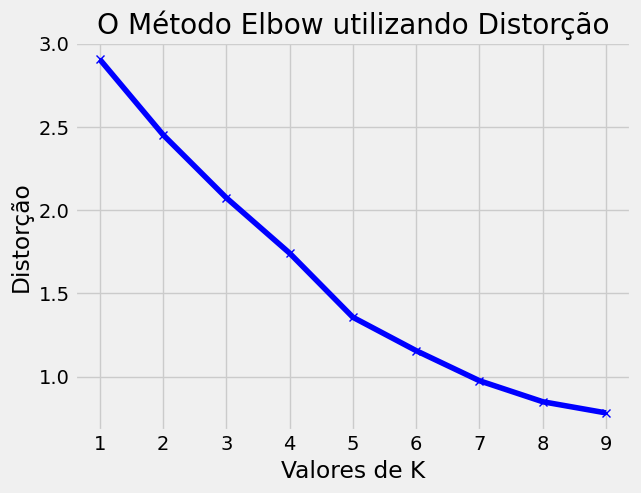

In [11]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Distorção')
plt.title('O Método Elbow utilizando Distorção')
plt.show()

In [12]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 1448.8562650917243
2 : 964.0200522242276
3 : 592.7126187916216
4 : 412.62856325946433
5 : 253.6339869755152
6 : 170.90876659806685
7 : 120.47269765639969
8 : 89.18848232666558
9 : 75.21775321680487


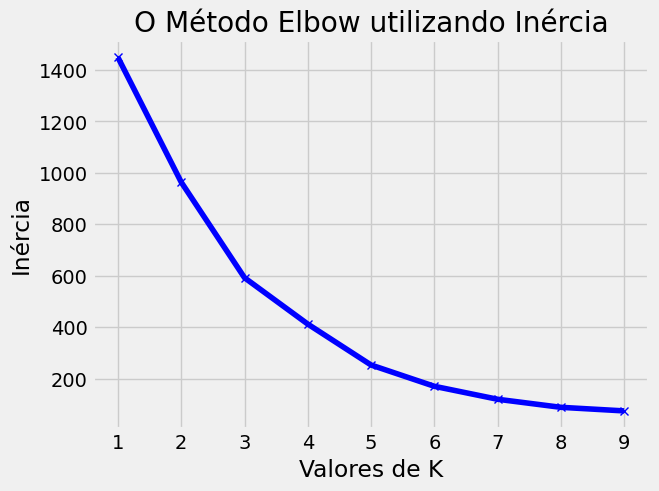

In [13]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Inércia')
plt.title('O Método Elbow utilizando Inércia')
plt.show()

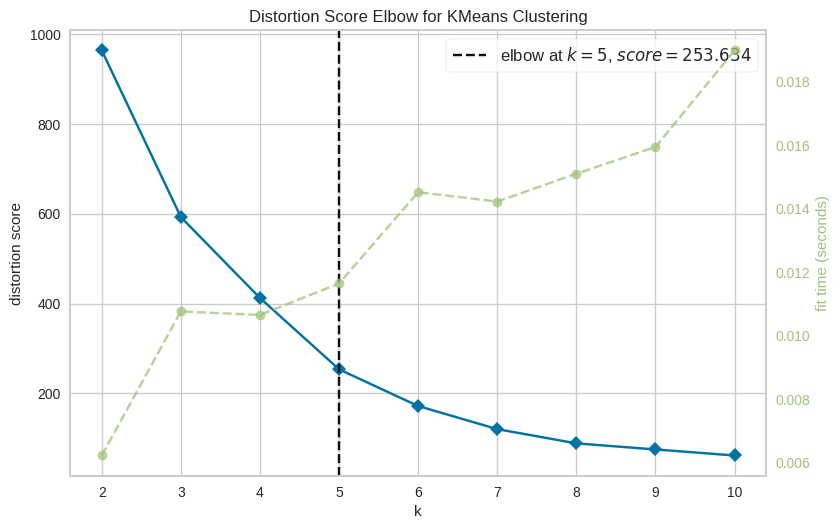

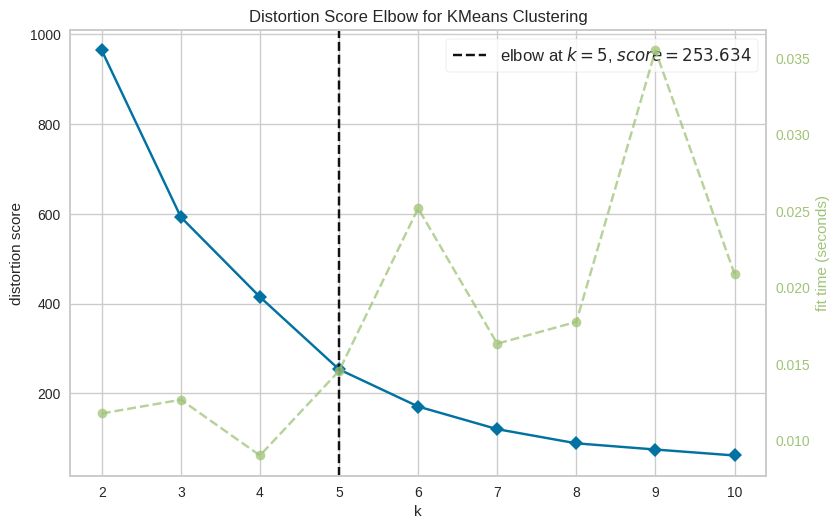

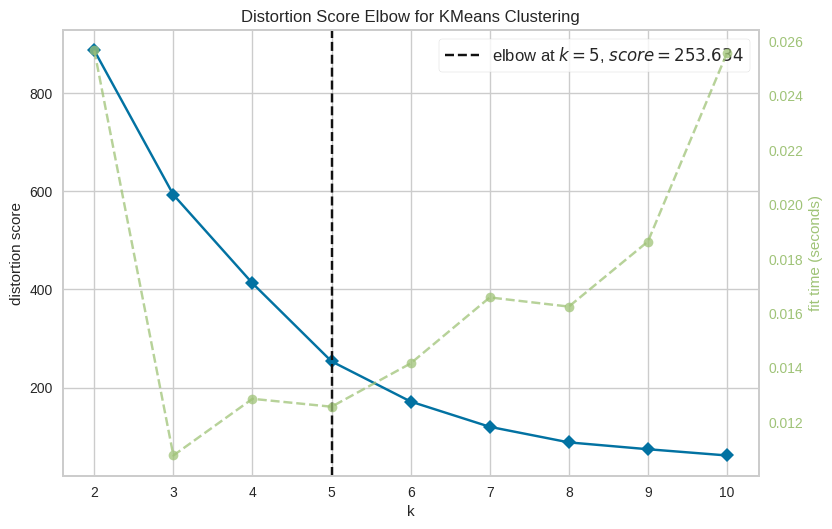

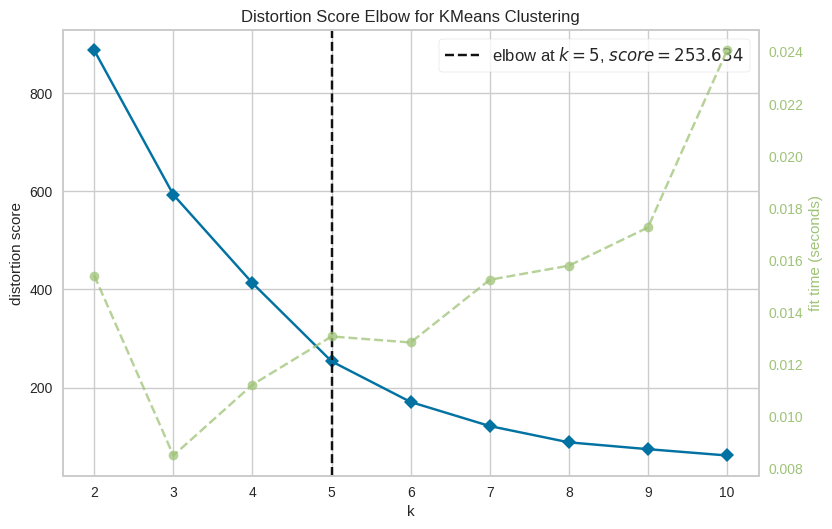

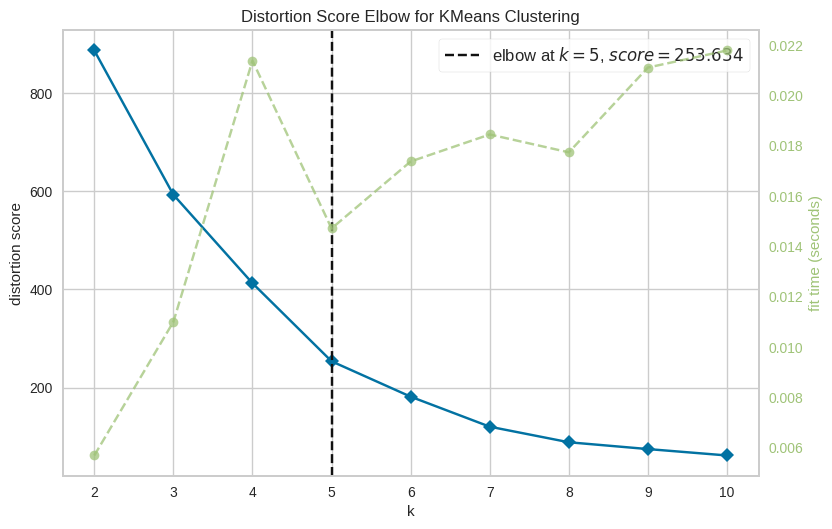

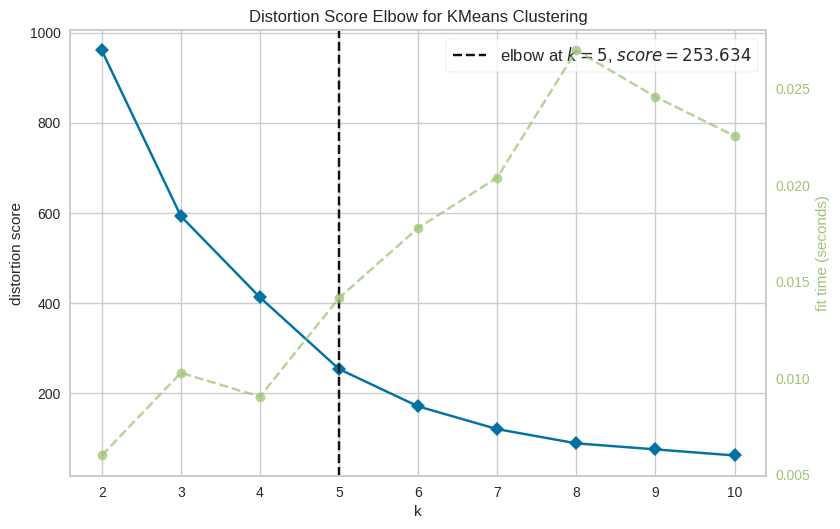

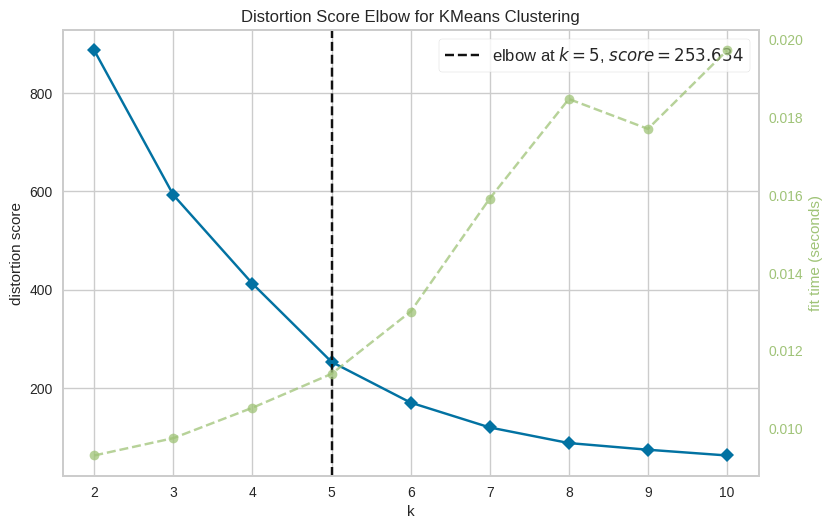

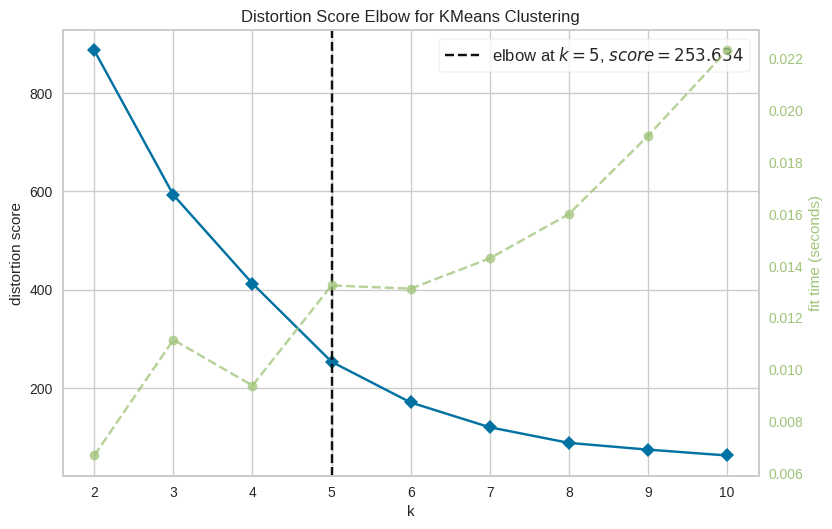

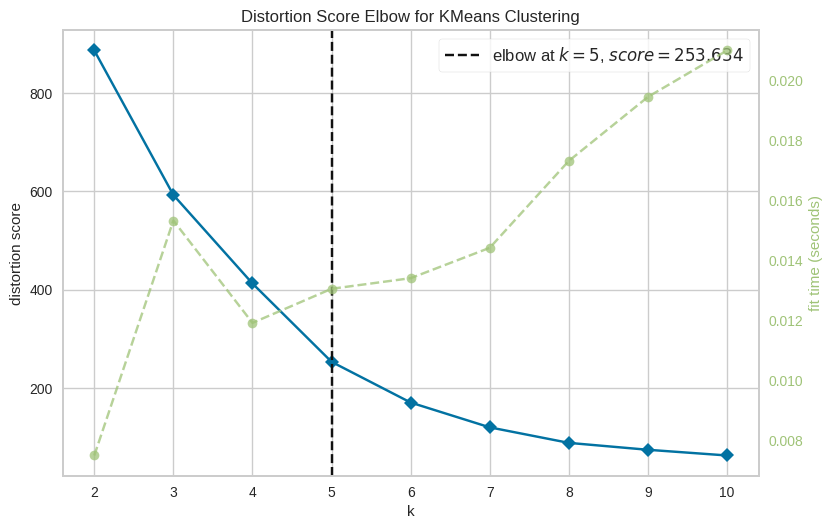

In [14]:
from yellowbrick.cluster import KElbowVisualizer

silModel = filtered_jan_jun_2022['PCA']
silModel = np.array((list(silModel)))
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(silModel)
    elb_visualizer = KElbowVisualizer(kmeanModel)
    elb_visualizer.fit(silModel)    
    elb_visualizer.show()  
    


## K = 5

[2 2 4 2 0 0 0 2 2 4 4 2 2 2 2 4 4 2 2 2 2 4 4 2 2 2 4 2 2 2 2 2 2 2 4 2 0
 0 0 0 2 2 2 4 2 2 2 2 2 3 3 3 2 1 1 1 2 2 2 2 2 2 2 2 4 2 2 4 4 4 4 2 2 4
 4 2 4 4 4 2 0 2 2 2 4 4 2 2 2 4 4 2 2 4]


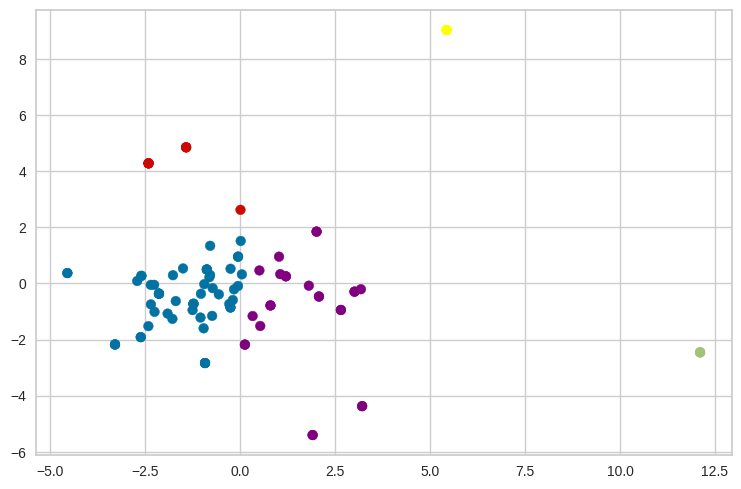

In [17]:
finalModel2 = filtered_jan_jun_2022['PCA']
finalModel2 = np.array((list(finalModel)))
finalModel2

kmeanModel2 = KMeans(n_clusters=5).fit(finalModel2)
kmeanModel2.fit(finalModel2)

print(kmeanModel2.labels_)


LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b', 3: 'yellow', 4: 'purple'}
label_color = [LABEL_COLOR_MAP[l] for l in kmeanModel2.labels_]
plt.scatter(finalModel2[:,0], finalModel2[:,1], c=label_color)

In [18]:
kmeanModel2.labels_

array([2, 2, 4, 2, 0, 0, 0, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 0, 0, 0, 0, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 3, 3, 3, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       2, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 0, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 4], dtype=int32)

In [19]:
array2 = np.array((list(filtered_jan_jun_2022["title"])))
array2

array(['cotonet dos test de covid-19 já estã infect na caix , mostr microscópi',
       'hom quebr máquin verific de qr cod da marc da best na chin',
       'saiu o randomiz da ivermectin e hidroxicloroquin em 2022 , fda aprov e novart vai doar comprim',
       'hydra , o nan polv , é encontr em vacin da pfiz contr covid-19',
       'spray israelens cit por bolsonar é apont com soluçã par pandem pel fantást',
       'spray israelens cit por bolsonar é apont com soluçã par pandem pel fantást',
       'spray israelens cit por bolsonar é apont com soluçã par pandem pel fantást',
       'agor ter cas de aids sem hiv por caus da vacin contr covid-19',
       'agor ter cas de aids sem hiv por caus da vacin contr covid-19',
       'alemanh descobr que vacin contr covid-19 é 40 vez mais mortal do que se esper',
       'alemanh descobr que vacin contr covid-19 é 40 vez mais mortal do que se esper',
       'varíol dos macac foi caus pel vacin contr covid-19',
       'varíol dos macac foi caus pe

In [20]:
pred_classes = kmeanModel2.predict(finalModel2)
pred_classes = list(pred_classes)

dictionaryPrime = dict(zip(filtered_jan_jun_2022["title"], pred_classes))
dictionaryPrime

{'cotonet dos test de covid-19 já estã infect na caix , mostr microscópi': 2,
 'hom quebr máquin verific de qr cod da marc da best na chin': 2,
 'saiu o randomiz da ivermectin e hidroxicloroquin em 2022 , fda aprov e novart vai doar comprim': 4,
 'hydra , o nan polv , é encontr em vacin da pfiz contr covid-19': 2,
 'spray israelens cit por bolsonar é apont com soluçã par pandem pel fantást': 0,
 'agor ter cas de aids sem hiv por caus da vacin contr covid-19': 2,
 'alemanh descobr que vacin contr covid-19 é 40 vez mais mortal do que se esper': 4,
 'varíol dos macac foi caus pel vacin contr covid-19': 2,
 'pfiz public list de 1291 efeit colater grav que prov que vacin nã sã segur': 4,
 'proteín spik da vacin caus cânc , descobr médic': 2,
 'vacin contr covid-19 está caus nov hepatit em crianc': 2,
 'tend foi construíd no pacaembu par atend de cas de covid-19 após o carnaval': 2,
 'covid-19 foi cri apen par implement do govern mundial': 2,
 'pfiz admit em document que nã está aplic vacin 

## Word Cloud for first cluster n = 0

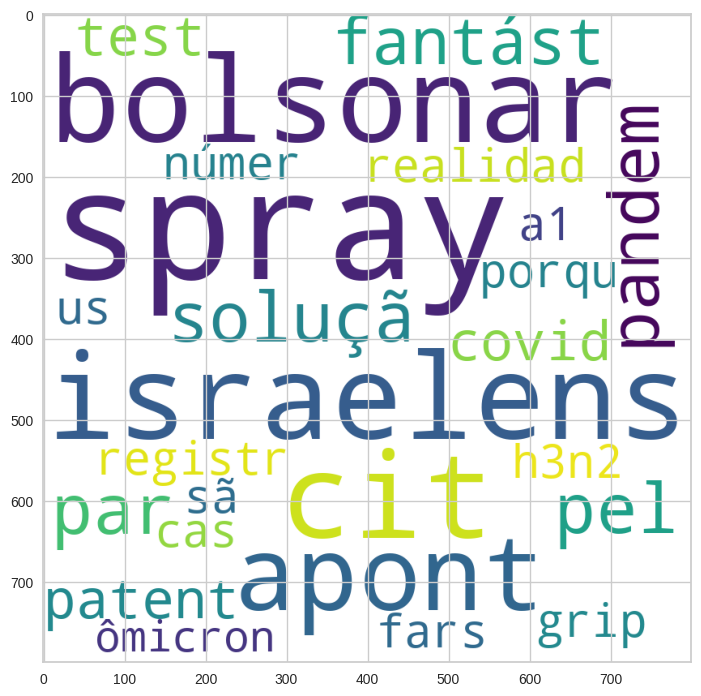

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

custom_stop_words = ['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'é', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua', 'ou', 'ser', 'quando', 'muito', 'há', 'nos', 'já', 'está', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estão', 'você', 'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'têm', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'será', 'nós', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos', 'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos', 'houveram', 'houvera', 'houvéramos', 'haja', 'hajamos', 'hajam', 'houvesse', 'houvéssemos', 'houvessem', 'houver', 'houvermos', 'houverem', 'houverei', 'houverá', 'houveremos', 'houverão', 'houveria', 'houveríamos', 'houveriam', 'sou', 'somos', 'são', 'era', 'éramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fora', 'fôramos', 'seja', 'sejamos', 'sejam', 'fosse', 'fôssemos', 'fossem', 'for', 'formos', 'forem', 'serei', 'será', 'seremos', 'serão', 'seria', 'seríamos', 'seriam', 'tenho', 'tem', 'temos', 'tém', 'tinha', 'tínhamos', 'tinham', 'tive', 'teve', 'tivemos', 'tiveram', 'tivera', 'tivéramos', 'tenha', 'tenhamos', 'tenham', 'tivesse', 'tivéssemos', 'tivessem', 'tiver', 'tivermos', 'tiverem', 'terei', 'terá', 'teremos', 'terão', 'teria', 'teríamos', 'teriam']

clusterOneWords = [k for k, v in dictionaryPrime.items() if v == 0]
unique_string=(" ").join(clusterOneWords)
wordCloudOne = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudOne)

## Word Cloud for second cluster n = 1

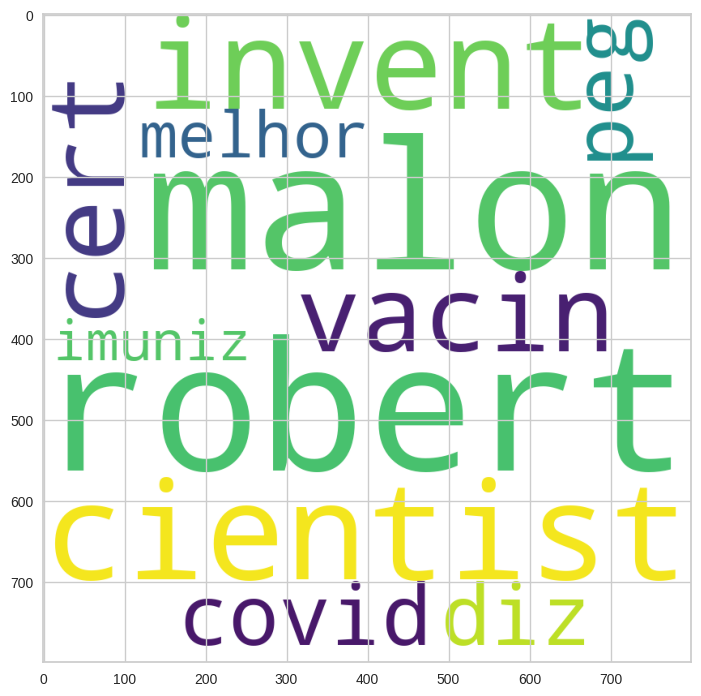

In [22]:
clusterTwoWords = [k for k, v in dictionaryPrime.items() if v == 1]

unique_string2=(" ").join(clusterTwoWords)
wordCloudTwo = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string2)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudTwo)

## Word Cloud for third cluster n = 2

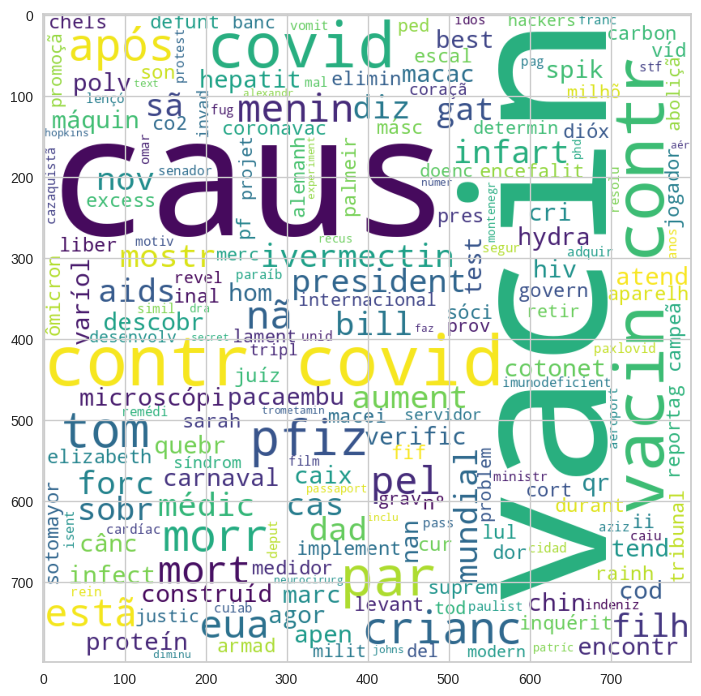

In [23]:
clusterThreeWords = [k for k, v in dictionaryPrime.items() if v == 2]

unique_string3=(" ").join(clusterThreeWords)

wordCloudThree = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string3)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudThree)

## Word Cloud for fourth cluster n = 3

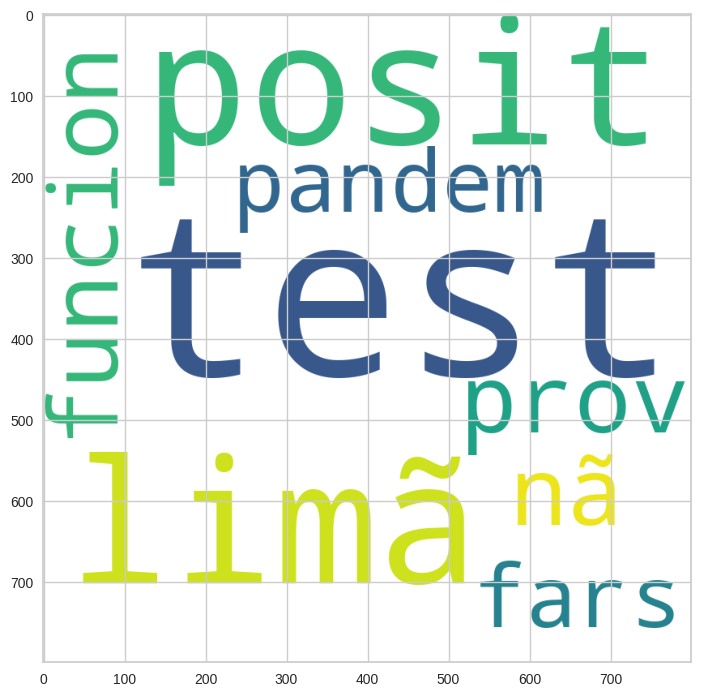

In [24]:
clusterFourWords = [k for k, v in dictionaryPrime.items() if v == 3]

unique_string4=(" ").join(clusterFourWords)

wordCloudFour = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string4)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudFour)

## Word Cloud for fourth cluster n = 4

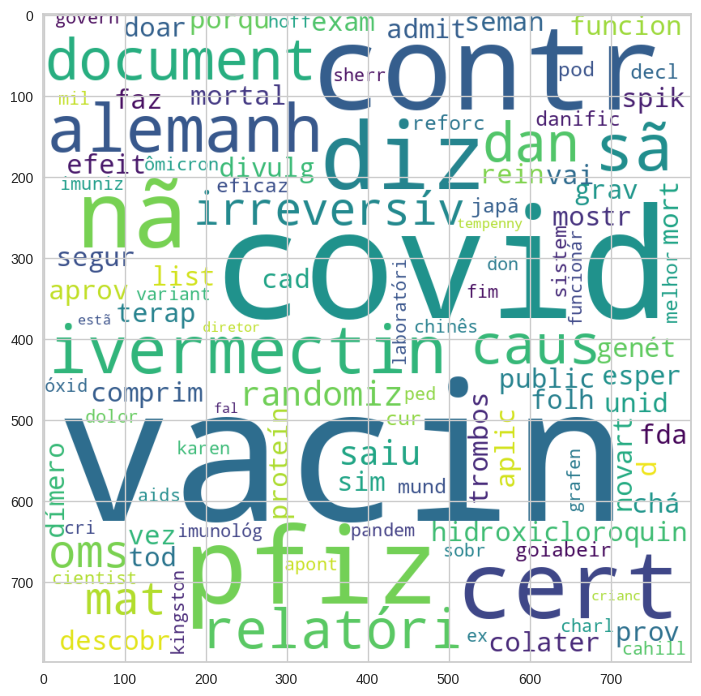

In [25]:
clusterFiveWords = [k for k, v in dictionaryPrime.items() if v == 4]

unique_string5=(" ").join(clusterFiveWords)

wordCloudFive = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string5)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudFive)